<h1 style="font-size">Develop an application for a credit scoring model</h1>


In [ ]:
# import библиотек
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import roc_auc_score, roc_curve, confusion_matrix


# чтобы отобразить больше столбцов и строк
# pd.options.display.max_rows = 50
pd.options.display.max_columns = 200

# для построения графиков
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [5, 4]
import seaborn as sns

# Загрузка данных

In [ ]:
!gdown 1YUEMYCmvLs786AyIUV4l4NZg6k4Sb1cj

Downloading...
From: https://drive.google.com/uc?id=1YUEMYCmvLs786AyIUV4l4NZg6k4Sb1cj
To: /content/accept.csv
100% 3.02M/3.02M [00:00<00:00, 158MB/s]


In [ ]:
accept = pd.read_csv("/content/accept.csv")

# Explatory Data Analysis

In [ ]:
# Теперь данные хранятся в переменной accept, которая имеет тип DataFrame:
type(accept)

pandas.core.frame.DataFrame

In [ ]:
accept.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32554 entries, 0 to 32553
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   target                     32554 non-null  int64  
 1   INCOME_TYPE                32554 non-null  object 
 2   EDUCATION_                 32554 non-null  object 
 3   CUSTOMER_CATEGORY_         13095 non-null  object 
 4   income                     31901 non-null  float64
 5   DEPENDANT_NUMBER           32514 non-null  float64
 6   IS_EMPL                    32554 non-null  int64  
 7   COUNT_ACTIVE_CREDIT_NO_CC  24190 non-null  float64
 8   CNT_MNTH_FROM_LAST_PMNT    22409 non-null  float64
 9   age                        32554 non-null  float64
 10  experience                 32507 non-null  float64
 11  inquiry_14_day             23333 non-null  float64
 12  inquiry_21_day             23333 non-null  float64
 13  count_mnth_act_passport    32554 non-null  flo

In [ ]:
accept.columns = [col.lower() for col in accept.columns]

In [ ]:
# посмотрим на данные
accept.head()

,target,income_type,education_,customer_category_,income,dependant_number,is_empl,count_active_credit_no_cc,cnt_mnth_from_last_pmnt,age,experience,inquiry_14_day,inquiry_21_day,count_mnth_act_passport,uid
0,0,2NDFL,elementary,NaN,56245.0,0.0,0,NaN,NaN,50.567123,2.131507,NaN,NaN,5.536986,10
1,0,OTHER,elementary,Corporate,119510.0,0.0,1,1.0,1.115569,28.191781,2.032877,1.0,1.0,8.109589,11
2,0,2NDFL,advanced,NaN,12020.0,0.0,0,1.0,0.303786,36.437742,17.731507,0.0,0.0,9.123535,13
3,0,OTHER,advanced,Corporate,21611.0,0.0,1,NaN,NaN,33.333446,1.711528,NaN,NaN,7.972678,15
4,0,OTHER,elementary,VIP,146841.0,0.0,1,0.0,30.530914,36.531073,0.577648,0.0,0.0,7.737705,17


In [ ]:
# Посмотрим размер таблицы:
accept.shape

(32554, 15)

In [ ]:
# список колонок
accept.columns

Index(['target', 'income_type', 'education_', 'customer_category_', 'income',
       'dependant_number', 'is_empl', 'count_active_credit_no_cc',
       'cnt_mnth_from_last_pmnt', 'age', 'experience', 'inquiry_14_day',
       'inquiry_21_day', 'count_mnth_act_passport', 'uid'],
      dtype='object')

In [ ]:
# список колонок с типами
accept.dtypes

target                         int64
income_type                   object
education_                    object
customer_category_            object
income                       float64
dependant_number             float64
is_empl                        int64
count_active_credit_no_cc    float64
cnt_mnth_from_last_pmnt      float64
age                          float64
experience                   float64
inquiry_14_day               float64
inquiry_21_day               float64
count_mnth_act_passport      float64
uid                            int64
dtype: object

In [ ]:
accept.describe(include = 'all')

,target,income_type,education_,customer_category_,income,dependant_number,is_empl,count_active_credit_no_cc,cnt_mnth_from_last_pmnt,age,experience,inquiry_14_day,inquiry_21_day,count_mnth_act_passport,uid
count,32554.000000,32554,32554,13095,3.190100e+04,32514.000000,32554.000000,24190.000000,22409.000000,32554.000000,32507.000000,23333.000000,23333.000000,32554.000000,32554.000000
unique,NaN,2,4,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,OTHER,elementary,Corporate,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,21863,21330,12710,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,0.021411,NaN,NaN,NaN,6.133177e+04,0.006182,0.390152,0.661926,20.856970,36.432497,4.889609,0.362277,0.426006,7.250201,70630.132795
std,0.144751,NaN,NaN,NaN,1.069330e+05,0.096019,0.487792,0.835298,143.422108,8.219484,5.344778,0.611643,0.685549,3.341657,40512.136053
min,0.000000,NaN,NaN,NaN,0.000000e+00,0.000000,0.000000,0.000000,-66.559028,25.000187,-157.184939,0.000000,0.000000,-0.019126,10.000000
25%,0.000000,NaN,NaN,NaN,2.677800e+04,0.000000,0.000000,0.000000,0.530578,29.507145,1.241436,0.000000,0.000000,4.996845,35821.750000
50%,0.000000,NaN,NaN,NaN,4.146300e+04,0.000000,0.000000,0.000000,0.928136,34.734015,3.279452,0.000000,0.000000,7.780822,70762.000000
75%,0.000000,NaN,NaN,NaN,7.000000e+04,0.000000,1.000000,1.000000,3.667899,42.200724,6.479452,1.000000,1.000000,9.912598,105834.250000


> переменные имеют выбросы (отрицательные значения)
- count_mnth_act_passport
- experience
- cnt_mnth_from_last_pmnt

In [ ]:
# заменим отрицательные значения на пропуск
for col in ['count_mnth_act_passport', 'experience', 'cnt_mnth_from_last_pmnt']:
  accept[col]=accept[col].map(lambda x: x if x>0 and x<60 else np.NaN)

In [ ]:
accept.isna().mean().sort_values()[accept.isna().mean()>0].to_dict()
# len(accept.isna().mean().sort_values()[accept.isna().mean()>0].index.to_list())

{'count_mnth_act_passport': 0.00021502733919026847,
 'dependant_number': 0.0012287276525158198,
 'experience': 0.0015359095656447747,
 'income': 0.02005897892732076,
 'count_active_credit_no_cc': 0.25692695214105793,
 'inquiry_14_day': 0.28325244209620937,
 'inquiry_21_day': 0.28325244209620937,
 'cnt_mnth_from_last_pmnt': 0.3425385513300977,
 'customer_category_': 0.5977452847576334}

> 8 переменных имеют пропущенные значения:
- 'dependant_number',
- 'experience',
- 'income',
- 'count_active_credit_no_cc',
- 'inquiry_14_day',
- 'inquiry_21_day',
- 'cnt_mnth_from_last_pmnt',
- 'customer_category_'

Посмотрим на целевую переменную

In [ ]:
accept.target.value_counts()

0    31857
1      697
Name: target, dtype: int64

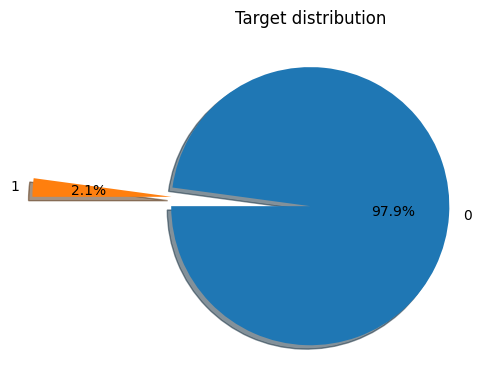

In [ ]:
plt.figure(figsize=(5,4))

slices = accept.target.value_counts()
labels = accept.target.value_counts().reset_index()['index']
explode = accept.target.value_counts().reset_index()['index']

plt.pie(slices,
        labels=labels,
        explode=explode,
        shadow=True,
        startangle=180,
        autopct='%1.1f%%',
        )


plt.title('Target distribution')
plt.tight_layout()

plt.show()

> Наблюдается яркий дисбаланс классов

## посмотрим на простые зависимости относительно целевого признака

In [ ]:
pd.crosstab(accept.income_type, accept.target, normalize='index')

target,0,1
income_type,,
2NDFL,0.981947,0.018053
OTHER,0.976947,0.023053


In [ ]:
# или можно так
accept.groupby('income_type', as_index=False).agg({'target':'mean'})

,income_type,target
0,2NDFL,0.018053
1,OTHER,0.023053


> уровень дефолта в типе подтверждения дохода OTHER выше, чем в 2NDFL

In [ ]:
pd.crosstab(accept.count_active_credit_no_cc, accept.target, normalize='index')

target,0,1
count_active_credit_no_cc,,
0.0,0.985171,0.014829
1.0,0.980765,0.019235
2.0,0.969006,0.030994
3.0,0.960360,0.039640
4.0,0.955414,0.044586
5.0,0.906977,0.093023
6.0,0.909091,0.090909
7.0,0.916667,0.083333
8.0,0.666667,0.333333


>наблюдается закономерность, чем больше кредитов, тем выше дефолтность.

In [ ]:
pd.crosstab(accept.education_, accept.target, normalize='index')

target,0,1
education_,,
advanced,0.974539,0.025461
beginner,0.980965,0.019035
elementary,0.980309,0.019691
high,0.973984,0.026016


> образование также разделят клиентов по уровню дефолтности

Влияет ли возраст?

In [ ]:
accept.groupby('target')['age'].mean()

target
0    36.42993
1    36.54982
Name: age, dtype: float64

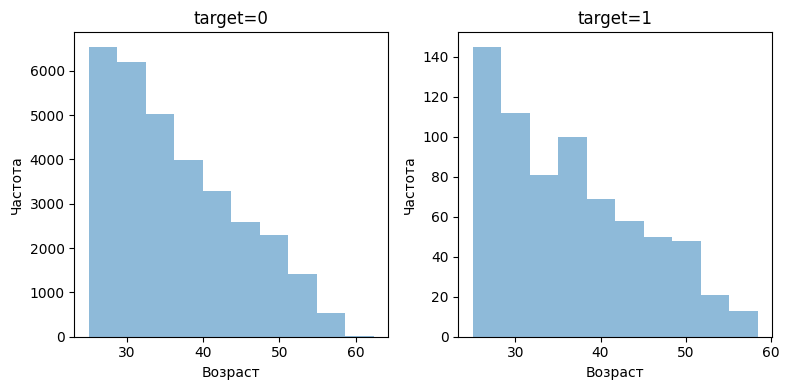

In [ ]:
grouped_accept = accept.groupby('target')
# Создайте две гистограммы рядом
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(8, 4))

for (group, subset), ax in zip(grouped_accept, axes):
    ax.hist(subset['age'], bins=10, alpha=0.5)
    ax.set_title(f'target={group}')
    ax.set_xlabel('Возраст')
    ax.set_ylabel('Частота')

plt.tight_layout()
plt.show()


> возраст не влияет

Есть ли коррелированные переменные?

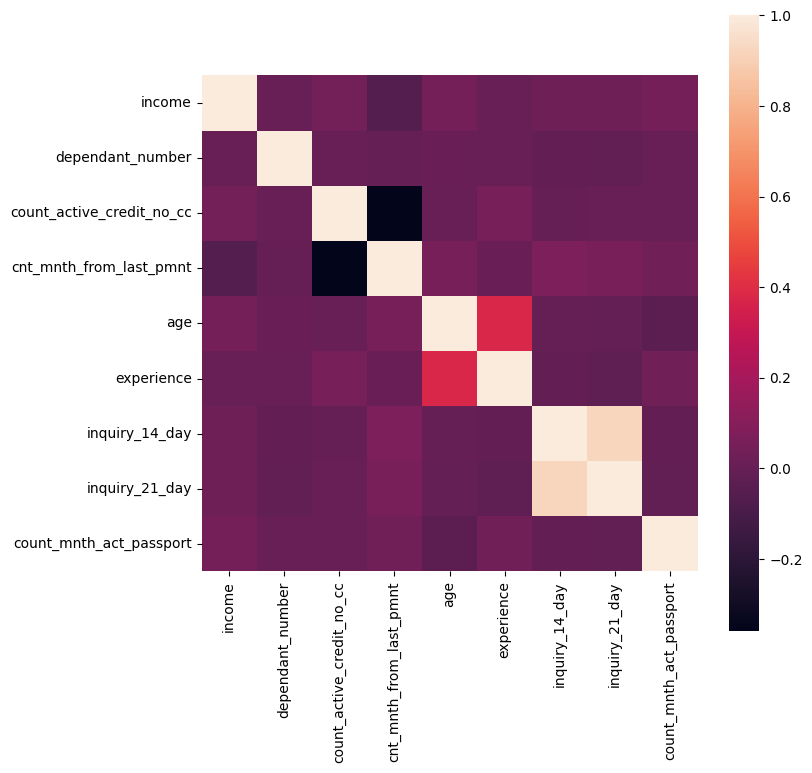

In [ ]:
# матрица корреляций
correlations = accept.select_dtypes(include=['float64']).corr()
plt.figure(figsize=(8, 8))
sns.heatmap(correlations, square=True)
plt.show()

**Выводы:**
 - Датасет содержит 32554 строки и 15 колонок, из них 5 типа категория, целевая переменная (target) бинарная, остальные интервальные
 - Целевая переменная - бинарная, доля 1 - 2.1%
 - 9 переменных имеют пропуски
 - inquiry_14_day и inquiry_21_day сильно коррелируют (кор Пирсона = 0.922379)


**по итогам разведочного анализа данных:**
 - анализ и обработка пропусков
 - анализ и обработка выбросов
 - создание новых фичей

Иногда удается найти простую закономерность в данных и прийти к решению, что сложные методы машинного обучения не нужны

# Создание новых переменных

In [ ]:
# создание новых переменных
accept['ratio_experience'] = accept['experience']/accept['age']
accept['ratio_experience'].describe()

count    32504.000000
mean         0.128936
std          0.119264
min          0.001370
25%          0.036351
50%          0.094492
75%          0.183493
max          0.731880
Name: ratio_experience, dtype: float64

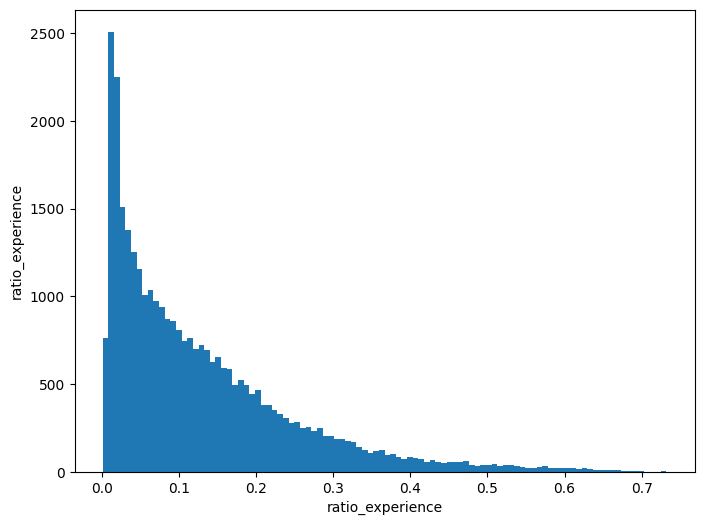

In [ ]:
plt.figure(figsize=(8,6))

plt.hist(accept['ratio_experience'].values, bins=100)
plt.xlabel('ratio_experience')
plt.ylabel('ratio_experience')
plt.show()

# Определяем роли переменных

In [ ]:
# вещественные переменные
interval_features = accept.select_dtypes(include=['float64', 'int64']).columns.tolist()
interval_features.remove('target')
interval_features.remove('uid')
interval_features.remove('is_empl')
interval_features.remove('dependant_number')
interval_features

['income',
 'count_active_credit_no_cc',
 'cnt_mnth_from_last_pmnt',
 'age',
 'experience',
 'inquiry_14_day',
 'inquiry_21_day',
 'count_mnth_act_passport',
 'ratio_experience']

In [ ]:
# категориальные переменные
categorical_features = accept.select_dtypes(include=['object']).columns.tolist()
categorical_features = categorical_features+['is_empl']+['dependant_number']
categorical_features

['income_type',
 'education_',
 'customer_category_',
 'is_empl',
 'dependant_number']

# WoE

In [ ]:
def calculate_woe_iv(dataset, feature, target):
    print(feature)
    values_counts = dataset[feature].value_counts(dropna=False)

    lst = []
    for val in values_counts.index:
        lst.append({
            'Value': val,
            'All': values_counts[val],
            'Good': dataset[(dataset[feature] == val) & (dataset[target] == 0)].count()[feature],
            'Bad': dataset[(dataset[feature] == val) & (dataset[target] == 1)].count()[feature]
        })

    dset = pd.DataFrame(lst)
    dset['Distr_Good'] = dset['Good'] / dset['Good'].sum()
    dset['Distr_Bad'] = dset['Bad'] / dset['Bad'].sum()

    # Добавим псевдоконстанту, чтобы избежать деления на 0
    dset['Distr_Bad'] = np.where(dset['Distr_Bad'] == 0, 0.0001, dset['Distr_Bad'])
    dset['Distr_Good'] = np.where(dset['Distr_Good'] == 0, 0.0001, dset['Distr_Good'])

    dset['WoE'] = np.log(dset['Distr_Good'] / dset['Distr_Bad'])

    # Замените значения inf на 0
    dset.replace({'WoE': {np.inf: 0, -np.inf: 0}}, inplace=True)

    dset['IV'] = (dset['Distr_Good'] - dset['Distr_Bad']) * dset['WoE']
    iv = dset['IV'].sum()

    dset = dset.sort_values(by='WoE')

    return dset, iv

In [ ]:
# делим интервальные переменные на бины
for feature in interval_features:
    accept[feature + '_bin'] = pd.qcut(accept[feature], 5, duplicates='drop')
    accept[feature + '_bin'] = accept[feature + '_bin'].cat.add_categories("0-0").fillna("0-0")

for feature in categorical_features:
    accept[feature] = accept[feature].fillna("UNK")

# Разделим на трейн и тест

In [ ]:
train, test = train_test_split(accept,
                               test_size=0.3,
                               random_state=17,
                               stratify=accept['target'])

In [ ]:
train['target'].mean()

0.021415719489182427

In [ ]:
test['target'].mean()

0.021398587078939286

# строим модель

In [ ]:
scorecard = pd.DataFrame()

In [ ]:
for feature in interval_features:

    df, iv = calculate_woe_iv(train, feature + '_bin', 'target')
    df['feature'] = feature
    train = train.merge(df[['Value', 'WoE']], how='inner', left_on=feature + '_bin', right_on='Value' )
    train = train.rename(columns={'WoE':'WoE'+'_'+feature})

    train = train.drop(columns = [feature, feature + '_bin', 'Value'])

    test = test.merge(df[['Value', 'WoE']], how='inner', left_on=feature + '_bin', right_on='Value' )
    test = test.rename(columns={'WoE':'WoE'+'_'+feature})


    test = test.drop(columns = [feature, feature + '_bin', 'Value'])
    scorecard = pd.concat([scorecard, df[['feature', 'Value', 'WoE']]])
    print('feature', feature, '  IV= ',iv)

income_bin
feature income   IV=  0.17161382560397528
count_active_credit_no_cc_bin
feature count_active_credit_no_cc   IV=  0.13298741959449406
cnt_mnth_from_last_pmnt_bin
feature cnt_mnth_from_last_pmnt   IV=  0.11308669709878105
age_bin
feature age   IV=  0.012633516002956487
experience_bin
feature experience   IV=  0.49405338211809163
inquiry_14_day_bin
feature inquiry_14_day   IV=  0.10670723852532113
inquiry_21_day_bin
feature inquiry_21_day   IV=  0.1118098866297911
count_mnth_act_passport_bin
feature count_mnth_act_passport   IV=  0.046345306579091534
ratio_experience_bin
feature ratio_experience   IV=  0.5078052878061433


In [ ]:
for feature in categorical_features:
    df, iv = calculate_woe_iv(train, feature , 'target')
    df['feature'] = feature
    train = train.merge(df[['Value', 'WoE']], how='inner', left_on=feature, right_on='Value' )
    train = train.rename(columns={'WoE':'WoE'+'_'+feature})
    train = train.drop(columns = [feature, 'Value'])

    test = test.merge(df[['Value', 'WoE']], how='inner', left_on=feature, right_on='Value' )
    test = test.rename(columns={'WoE':'WoE'+'_'+feature})
    test = test.drop(columns = [feature, 'Value'])
    scorecard = pd.concat([scorecard, df[['feature', 'Value', 'WoE']]])


    print('feature', feature, '  IV= ',iv)

income_type
feature income_type   IV=  0.01156523241841005
education_
feature education_   IV=  0.020121950916274327
customer_category_
feature customer_category_   IV=  0.5505929544283652
is_empl
feature is_empl   IV=  0.7773330102889798
dependant_number
feature dependant_number   IV=  0.4501731539801788


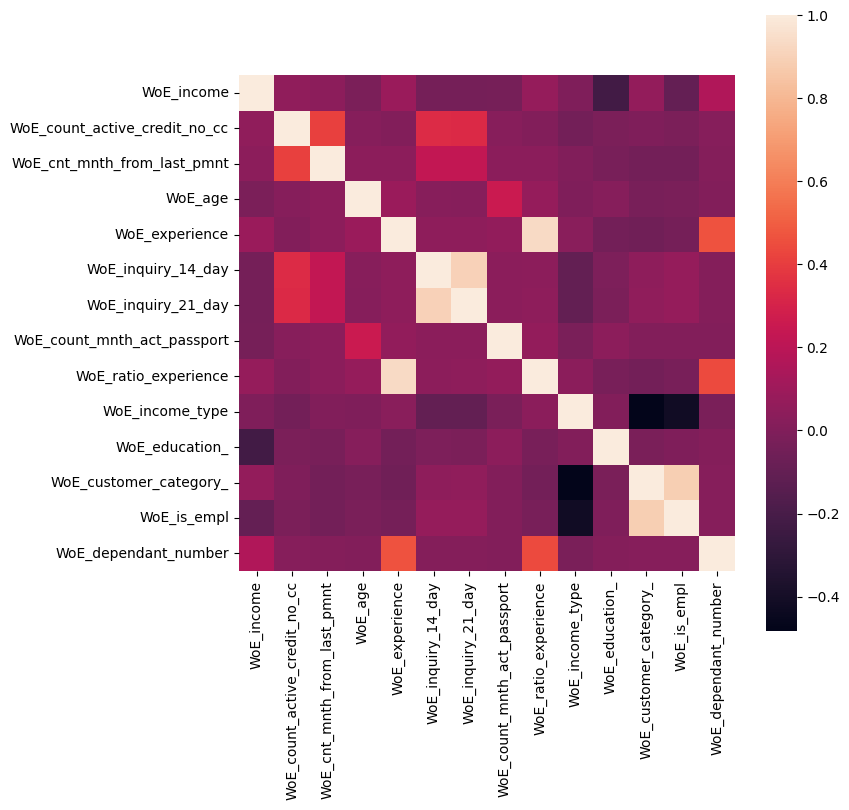

In [ ]:
# импорт библиотек для графиков
# матрица корреляций
correlations_woe = train.select_dtypes(include=['float64']).corr()
plt.figure(figsize=(8, 8))
sns.heatmap(correlations_woe, square=True)
plt.show()

In [ ]:
features = test.columns.tolist()
features.remove('uid')
features.remove('target')
# исключаем, так как IV<0.02
features.remove('WoE_income_type')
features.remove('WoE_age')

# исключим inquiry_14_day, так inquiry_14_day коррелирует с inquiry_21_day,
# при этом IV у inquiry_21_day выше
features.remove('WoE_inquiry_14_day')

# исключаем WoE_CUSTOMER_CATEGORY_, так как коррелирует WoE_is_EMPL
features.remove('WoE_customer_category_')

# исключаем так как коррелирует experience с ratio_experience
features.remove('WoE_experience')

features



['WoE_income',
 'WoE_count_active_credit_no_cc',
 'WoE_cnt_mnth_from_last_pmnt',
 'WoE_inquiry_21_day',
 'WoE_count_mnth_act_passport',
 'WoE_ratio_experience',
 'WoE_education_',
 'WoE_is_empl',
 'WoE_dependant_number']

In [ ]:
train[features]

,WoE_income,WoE_count_active_credit_no_cc,WoE_cnt_mnth_from_last_pmnt,WoE_inquiry_21_day,WoE_count_mnth_act_passport,WoE_ratio_experience,WoE_education_,WoE_is_empl,WoE_dependant_number
0,0.050894,-0.656755,-0.097817,0.230436,-0.164907,-0.073487,0.091406,-0.443754,0.067363
1,0.050894,-0.656755,-0.097817,0.230436,-0.164907,-0.073487,0.091406,-0.443754,0.067363
2,0.050894,0.304535,-0.097817,0.230436,-0.164907,-0.073487,0.091406,-0.443754,0.067363
3,-0.083110,0.304535,-0.097817,0.230436,-0.164907,-0.073487,0.091406,-0.443754,0.067363
4,0.050894,-0.656755,0.082897,0.230436,-0.164907,-0.073487,0.091406,-0.443754,0.067363
...,...,...,...,...,...,...,...,...,...
22782,0.050894,-0.293523,-0.216825,-0.223166,0.280885,0.335338,0.091406,1.867364,-7.223179
22783,-1.556438,-0.656755,-0.097817,0.230436,0.148759,-0.170308,-0.202383,1.867364,-7.223179
22784,-1.556438,-0.656755,-0.097817,0.230436,-0.288578,-0.170308,-0.202383,1.867364,-7.223179
22785,-0.083110,-0.293523,-0.216825,-0.223166,0.280885,0.659358,0.091406,-0.443754,-0.801957


In [ ]:
test[features]

,WoE_income,WoE_count_active_credit_no_cc,WoE_cnt_mnth_from_last_pmnt,WoE_inquiry_21_day,WoE_count_mnth_act_passport,WoE_ratio_experience,WoE_education_,WoE_is_empl,WoE_dependant_number
0,0.050894,0.304535,0.082897,0.230436,0.280885,0.335338,-0.202383,-0.443754,0.067363
1,0.089602,0.304535,-0.206626,0.230436,0.280885,0.335338,-0.202383,-0.443754,0.067363
2,-0.135761,0.304535,-0.216825,0.230436,0.280885,0.335338,-0.202383,-0.443754,0.067363
3,-0.083110,0.304535,-0.216825,0.230436,0.280885,0.335338,-0.202383,-0.443754,0.067363
4,0.089602,0.304535,-0.097817,0.230436,0.280885,0.335338,-0.202383,-0.443754,0.067363
...,...,...,...,...,...,...,...,...,...
9762,-0.135761,0.304535,0.317431,0.230436,0.133279,-0.170308,0.091406,-0.443754,-0.730939
9763,0.050894,0.304535,0.317431,0.230436,0.280885,0.335338,0.091406,-0.443754,-0.730939
9764,-0.083110,0.304535,-0.097817,0.230436,0.280885,0.335338,0.091406,1.867364,-0.730939
9765,0.050894,0.304535,-0.097817,0.230436,0.280885,0.335338,0.091406,1.867364,-0.730939


In [ ]:
# logistic regression
X_train = train[features]
X_test = test[features]
y_train = train['target']
y_test = test['target']

logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression()

In [ ]:
features_coefs = pd.DataFrame(zip(X_train.columns, np.transpose(logreg.coef_.tolist()[0])),
                              columns=['features', 'coef'])

intercept = logreg.intercept_
print('intercept=', intercept)
features_coefs

intercept= [-3.74404608]


,features,coef
0,WoE_income,-1.020996
1,WoE_count_active_credit_no_cc,-0.657679
2,WoE_cnt_mnth_from_last_pmnt,-0.611082
3,WoE_inquiry_21_day,-0.567393
4,WoE_count_mnth_act_passport,-0.854862
5,WoE_ratio_experience,-0.787344
6,WoE_education_,-1.480390
7,WoE_is_empl,-1.091293
8,WoE_dependant_number,-0.768086


In [ ]:
y_pred = logreg.predict(X_test)


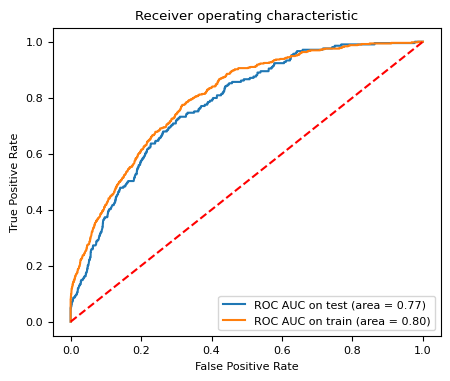

In [ ]:
plt.rc("font", size=8)


logit_roc_auc = roc_auc_score(y_test, logreg.predict_proba(X_test)[:,1])
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])



logit_roc_auc_train = roc_auc_score(y_train, logreg.predict_proba(X_train)[:,1])
fpr_train, tpr_train, thresholds_train = roc_curve(y_train, logreg.predict_proba(X_train)[:,1])


plt.figure()
plt.plot(fpr, tpr, label='ROC AUC on test (area = %0.2f)' % logit_roc_auc)
plt.plot(fpr_train, tpr_train, label='ROC AUC on train (area = %0.2f)' % logit_roc_auc_train)
plt.plot([0, 1], [0, 1],'r--')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

Геометрическое среднее между TPR и (1-FPR) используется для оценки баланса между чувствительностью и специфичностью модели.

In [ ]:
fpr, tpr, thresholds = roc_curve(y_train, logreg.predict_proba(X_train)[:,1])
gmeans = np.sqrt(tpr + (1-fpr))
# locate the index of the largest g-mean
ix = np.argmax(gmeans)
print('Best Threshold=%f, G-Mean=%.3f' % (thresholds[ix], gmeans[ix]))


Best Threshold=0.023938, G-Mean=1.207


In [ ]:
fpr

array([0.        , 0.        , 0.        , ..., 0.99986546, 0.99991031,
       1.        ])

In [ ]:
cutoff = thresholds[ix]
predictions_01 = np.where(logreg.predict_proba(X_test)[:,1] > cutoff, 1, 0) #Turn probability to 0-1 binary output

In [ ]:
test['predictions_01'] = [el for el in predictions_01]

<Figure size 500x400 with 0 Axes>

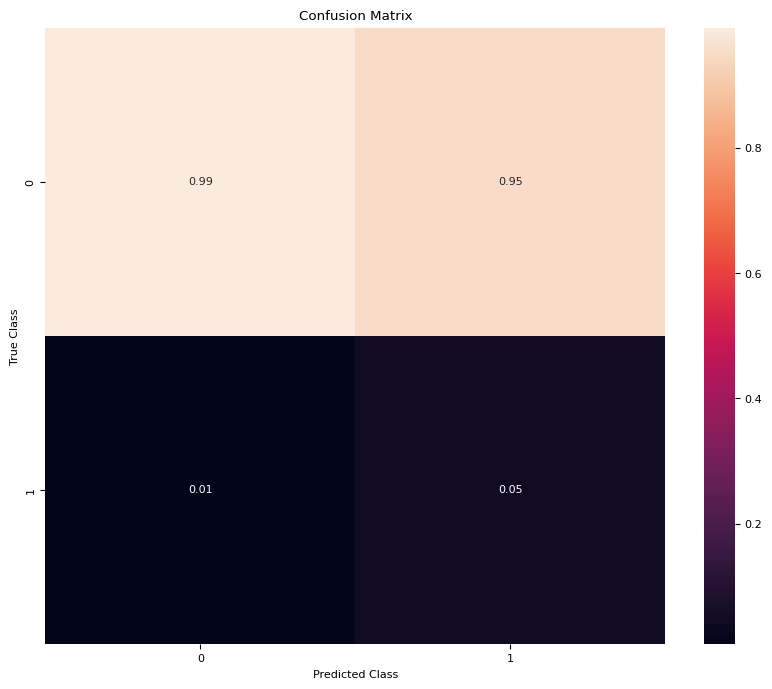

In [ ]:



#Print Confusion Matrix
plt.figure()
cm = confusion_matrix(y_test, test['predictions_01'], normalize='pred')
labels = ['0', '1']
plt.figure(figsize=(10,8))
sns.heatmap(cm,
            xticklabels = labels,
            yticklabels = labels,
            annot = True,
            # fmt='d',
            fmt=".2f",
            );
plt.title('Confusion Matrix')
plt.ylabel('True Class')
plt.xlabel('Predicted Class')
plt.show()

In [ ]:
cm

array([[0.99144016, 0.95109395],
       [0.00855984, 0.04890605]])

In [ ]:
# калибровка
scorecard['features'] = 'WoE_'+scorecard['feature'].astype(str)
scorecard = scorecard.merge(features_coefs,how='inner', on='features')
scorecard = scorecard.drop(columns = 'features')
scorecard

,feature,Value,WoE,coef
0,income,0-0,-1.556438,-1.020996
1,income,"(35000.0, 50000.0]",-0.135761,-1.020996
2,income,"(50000.0, 80000.0]",-0.083110,-1.020996
3,income,"(80000.0, 11450378.0]",0.050894,-1.020996
4,income,"(24674.0, 35000.0]",0.089602,-1.020996
5,income,"(-0.001, 24674.0]",0.594849,-1.020996
6,count_active_credit_no_cc,"(1.0, 8.0]",-0.656755,-0.657679
7,count_active_credit_no_cc,0-0,-0.293523,-0.657679
8,count_active_credit_no_cc,"(-0.001, 1.0]",0.304535,-0.657679
9,cnt_mnth_from_last_pmnt,0-0,-0.216825,-0.611082


# Калибровка модели
$ Score_i =  (βi × WoE_i + \frac {α} {n}) × Factor + \frac {Offset} {n} $

$ Factor = \frac {pdo} {ln(2)} $

$ Offset = Target Score — (Factor × ln(Target Odds)) $


For the example above,
we choose to have a target score of
600 to mean a 50 to 1 odds of good customer to bad,

and an increase of 20 means a doubling odds.

Note the choice of scaling does not affect the predictive strength of the scorecard.

pdo = 20
Odds = 50
Target_Score = 600

In [ ]:
pdo = 20
Target_Odds = 50
Target_Score = 600

Factor = pdo/np.log(2)
Offset = Target_Score-(Factor*np.log(Target_Odds))
print(Factor, Offset)

28.85390081777927 487.1228762045055


In [ ]:
scorecard['score'] = (-1)*(scorecard['coef']*scorecard['WoE'] + intercept/13)*Factor + Offset/13
scorecard['score'] = scorecard['score'].round(0)
scorecard['WoE'] = scorecard['WoE'].round(2)
scorecard['coef'] = scorecard['coef'].round(2)
scorecard

,feature,Value,WoE,coef,score
0,income,0-0,-1.56,-1.02,-0.0
1,income,"(35000.0, 50000.0]",-0.14,-1.02,42.0
2,income,"(50000.0, 80000.0]",-0.08,-1.02,43.0
3,income,"(80000.0, 11450378.0]",0.05,-1.02,47.0
4,income,"(24674.0, 35000.0]",0.09,-1.02,48.0
5,income,"(-0.001, 24674.0]",0.59,-1.02,63.0
6,count_active_credit_no_cc,"(1.0, 8.0]",-0.66,-0.66,33.0
7,count_active_credit_no_cc,0-0,-0.29,-0.66,40.0
8,count_active_credit_no_cc,"(-0.001, 1.0]",0.30,-0.66,52.0
9,cnt_mnth_from_last_pmnt,0-0,-0.22,-0.61,42.0


**До материалы**
- https://towardsdatascience.com/intro-to-credit-scorecard-9afeaaa3725f